# Risk

## Portfolio Management
### MLP Training

#### January 2025

Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu

***

## Data

As an example for analyzing risk, we consider 
* ETF data on various asset classes
* daily frequency
* 2017 through present

The ETF data ensures
* we are looking at traded security returns, not indexes
* thus, no issue of rolling futures, carry on FX, etc.
* Though there may be differences due to fund expenses and fund tracking error (oil?)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

In [2]:
import sys
sys.path.insert(0, '../cmds')
from portfolio import performanceMetrics
from risk import *

In [3]:
LOADFILE = '../data/risk_etf_data.xlsx'
info = pd.read_excel(LOADFILE,sheet_name='descriptions').set_index('ticker')
rets = pd.read_excel(LOADFILE,sheet_name='total returns').set_index('Date')
prices = pd.read_excel(LOADFILE,sheet_name='prices').set_index('Date')

FREQ = 252

In [4]:
info

,quoteType,shortName,volume,totalAssets,longBusinessSummary
ticker,,,,,
SPY,ETF,SPDR S&P 500,25645043,6.277738e+11,The Trust seeks to achieve its investment obje...
VEA,ETF,Vanguard FTSE Developed Markets,8774478,1.980812e+11,The fund employs an indexing investment approa...
UPRO,ETF,ProShares UltraPro S&P 500,3315634,4.505728e+09,The fund invests in financial instruments that...
GLD,ETF,SPDR Gold Trust,2602573,7.485812e+10,The Trust holds gold bars and from time to tim...
USO,ETF,United States Oil Fund,1557813,1.172853e+09,USO invests primarily in futures contracts for...
FXE,ETF,Invesco CurrencyShares Euro Cur,25365,1.709062e+08,NaN
BTC-USD,CRYPTOCURRENCY,Bitcoin USD,48209317888,NaN,NaN
HYG,ETF,iShares iBoxx $ High Yield Corp,23192952,1.588151e+10,The underlying index is a rules-based index co...
IEF,ETF,iShares 7-10 Year Treasury Bond,2343747,3.285465e+10,The underlying index measures the performance ...


***

$$\newcommand{\E}{E}$$
$$\newcommand{\rbar}{\bar{r}}$$
$$\newcommand{\rvec}{\boldsymbol{r}}$$
$$\newcommand{\rvecbar}{\boldsymbol{\bar{r}}}$$

$$\newcommand{\Ntime}{N}$$
$$\newcommand{\Nt}{N}$$

$$\newcommand{\rmat}{\boldsymbol{R}}$$

$$\newcommand{\riskmeasure}{\varrho}$$

$$\newcommand{\wt}{w}$$

$$\newcommand{\Nassets}{K}$$

$$\newcommand{\muvec}{\boldsymbol{\mu}}$$

$$\newcommand{\onevecNt}{\boldsymbol{1}_{\Ntime\times 1}}$$

$$\newcommand{\covest}{\hat{\boldsymbol{\Sigma}}}$$

$$\newcommand{\meanest}{\hat{\mu}}$$

$$\newcommand{\meanestvec}{\hat{\boldsymbol{\mu}}}$$

$$\newcommand{\covmat}{\boldsymbol{\Sigma}}$$

$$\newcommand{\rf}{r_f}$$

$$\newcommand{\VaR}{\text{VaR}}$$
$$\newcommand{\VaRqtau}{\VaR_{q,\tau}}$$
$$\newcommand{\pnlVaR}{\pnl^{\VaR}}$$
$$\newcommand{\pnlVaRqtau}{\pnl^{\VaR_{q,\tau}}}$$
$$\newcommand{\rVaR}{r^{\VaR}}$$
$$\newcommand{\rVaRqtau}{r^{\VaR_{q,\tau}}}$$
$$\newcommand{\loss}{L}$$

$$\newcommand{\Pr}{\mathbb{P}}$$

$$\newcommand{\quant}{q}$$
$$\newcommand{\port}{\Pi}$$
$$\newcommand{\pnl}{\Gamma}$$

$$\newcommand{\cdf}{\Phi}$$
$$\newcommand{\pdf}{\phi}$$

$$\newcommand{\zscore}{\texttt{z}}$$

$$\newcommand{\cdfz}{\cdf_{\zscore}}$$
$$\newcommand{\pdfz}{\pdf_{\zscore}}$$

$$\newcommand{\rlog}{\texttt{r}}$$

$$\newcommand{CVaR}{\text{CVaR}}$$
$$\newcommand{CVaRqtau}{\CVaR_{q,\tau}}$$
$$\newcommand{\pnlCVaR}{\pnl^\CVaR}$$
$$\newcommand{\pnlCVaRqtau}{\pnl^{\CVaR_{q,\tau}}}$$
$$\newcommand{\rCVaR}{r^\CVaR}$$
$$\newcommand{\rCVaRqtau}{r^{\CVaR_{q,\tau}}}$$

$$\newcommand{\rx}{\tilde{r}}$$

$$\newcommand{\mux}{\tilde{\mu}}$$

$$\newcommand{\sigx}{\tilde{\sigma}}$$

$$\newcommand{\Nsec}{K}$$

$$\newcommand{\avg}{\text{avg}}$$

$$\newcommand{\wtvec}{\boldsymbol{\wt}}$$

$$\newcommand{\muxvec}{\boldsymbol{\mux}}$$

$$\newcommand{\tan}{\text{tan}}$$

# Performance Measures

We have discussed various measures of risk.

Of course, we care about return as well as risk. 

We might be willing to take more risk for more return.

Below are measures of return and the risk-return tradeoff.

### Excess Returns

Many performance measures, as well as optimizations, will focus on **excess returns**. That is, the return on the portfolio /security beyond the risk-free rate.

We use tilde notation for excess returns to avoid writing the risk-free rate everywhere. That is,

$$\rx_{i,t} \equiv r_{i,t} - \rf$$

$$\mux \equiv \mu - \rf$$

### Mean Return

Mean (total or excess) return is the most utilized measure of ex-ante reward in an investment.

Most allocation and risk measures will consider mean return against some form of risk.

### Important for risk?
For measuring and analyzing risk, we will mostly consider **de-meaned** data. 
* We want to know the possible outcomes **relative** to the mean.
* Having an incorrect measure of the mean will cause error in our relative assessments.
* However, the main focus will be risk over short periods, for which the mean (trend) will not matter much to the calculation.

Interesting models of the mean are more useful for forecasting returns for directional investing.

### Sharpe Ratio

The **Sharpe ratio** is the tradeoff of **mean excess return** against **volatility**.

$$\text{Sharpe Ratio} \equiv \frac{\mux}{\sigx}$$

In some cases this measure is used for total returns, not excess:

$$\text{Sharpe Ratio} \equiv \frac{\mu}{\sigma}$$

#### Total Return Performance

In [5]:
rets_excess = rets.sub(rets['SHV'],axis=0)
performanceMetrics(rets,FREQ).style.format('{:.2%}')

,Mean,Vol,Sharpe,Min,Max
SPY,15.39%,18.36%,83.82%,-10.94%,9.06%
VEA,7.84%,17.34%,45.24%,-11.18%,8.90%
UPRO,39.53%,55.39%,71.35%,-34.95%,27.97%
GLD,10.72%,13.85%,77.43%,-5.37%,4.85%
USO,5.19%,38.76%,13.40%,-25.32%,16.67%
FXE,0.09%,7.21%,1.20%,-2.06%,2.12%
BTC,81.74%,71.15%,114.89%,-37.17%,25.25%
HYG,4.30%,8.77%,48.97%,-5.50%,6.55%
IEF,0.72%,6.89%,10.38%,-2.51%,2.64%
TIP,2.37%,6.07%,39.02%,-2.87%,4.45%


#### Excess Return Performance

In [6]:
performanceMetrics(rets_excess,FREQ).style.format('{:.2%}')

,Mean,Vol,Sharpe,Min,Max
SPY,13.41%,18.38%,72.92%,-10.97%,9.02%
VEA,5.86%,17.36%,33.75%,-11.20%,8.86%
UPRO,37.54%,55.41%,67.74%,-34.97%,27.93%
GLD,8.73%,13.80%,63.30%,-5.37%,4.82%
USO,3.21%,38.80%,8.26%,-25.38%,16.67%
FXE,-1.90%,7.18%,-26.50%,-2.03%,2.11%
BTC,79.75%,71.15%,112.09%,-37.19%,25.24%
HYG,2.31%,8.76%,26.33%,-5.52%,6.53%
IEF,-1.27%,6.81%,-18.69%,-2.52%,2.61%
TIP,0.38%,6.01%,6.31%,-2.81%,4.43%


***

## Data Form

### Return, Price, PnL, Other?

Our discussion of risk will be general to any asset class.
* Examples are across various assets.

The object of analysis will depend on the asset class:
* bonds and options: price
* equities, futures, and currency: return

At times, it will make sense to examine profit and loss (PnL).

### Model Approach
The modeling approach will rely on formulating the data such that it is
* stationary
    - Nearly always
    - This is often the motive for switching between prices, profits, returns, etc.

* iid (indepently and identically distributed)
    - Much of the complication is achieving this.

* normally distributed?
    - Rarely required.
    - A useful comparison.
    - At times a simplfiying approximation

### Means
* Does it make sense to analyze this for price and return?
* That is, do they both satisfy basic statistical properties to be well-suited to examining unconditional moments?

In [7]:
pd.concat([prices.mean(),rets.mean()*FREQ],axis=1,keys=['price','return']).style.format({'price':'{:.2f}','return':'{:.2%}'})

,price,return
SPY,347.92,15.39%
VEA,39.34,7.84%
UPRO,38.72,39.53%
GLD,159.45,10.72%
USO,73.78,5.19%
FXE,102.16,0.09%
BTC,25052.74,81.74%
HYG,66.98,4.30%
IEF,96.65,0.72%
TIP,101.13,2.37%


## Statistical Mean

The mean is the **first moment** of the (unspecified) distribution:
$$ \mu = \E[r]$$

The sample estimator for it is
$$\meanest = \frac{1}{\Ntime}\sum_{t=1}^\Ntime r_t$$

Note that this is often expressed with "bar" notation, $\bar{r}$.
* Here the notation is $\hat{\mu}$ for symmetry with many estimators below using "hat" notation.

### Caution on the Imprecision of Sample Means 

The mean is estimated imprecisely! This will complicate
* attribution
* allocation

By the Law of Large Numbers,

$$\sigma(\bar{x}) = \frac{\sigma(x)}{\sqrt{n}}$$

where $n$ is the sample size.

This says that the the sample mean inherits the uncertainty of the individual data, shrunk by the square root of the sample size.
* Financial returns have substantial volatility.
* We often have short time series.

#### Example
Suppose a hedge fund reports
* mean excess returns of 10%
* volatility of 25%
* across 4 years of data

How confident are you that the true mean excess return is positive?

***

# Risk

### Volatility or More?

What is meant by **risk**?

May be associated with
* loss
* volatility
* correlation
* worst outcomes
* sensitivity

Various risk measures try to give information on all these.

### Warning: Difference to Pricing

Risk uses different tools than pricing.
* No alternative **probability measures**.
* **Volatility** will mean actual variation, not options pricing quotes.
* Mostly use discrete-time models, not continuous-time stochastic calculus.

## Variance and Volatility (StdDev)

The variance is the **second centered moment** of the (unspecified) distribution.
$$\sigma^2 = \E\left[(r-\mu)^2\right]$$

The usual sample estimator for the variance is
$$\hat{\sigma}^2 = \frac{1}{\Ntime-1}\sum_{t=1}^\Ntime(r_t-\meanest)^2$$ 

#### Technical Issue
Note that though there are $\Ntime$ data points in the sample, the estimator for the variance uses $\Ntime-1$.

What is the reason? 
* statistically
* conceptually


### Standard Deviation

The standard deviation (in population and in sample) is the square root of the formulas above.
* We will often refer to this as the **volatility**.
* One could make the distinction of volatility as the time-varying (instantaneous) standard deviation of the process, but more often it is used synonomously with standard deviation.


In [8]:
vol = (rets.std().to_frame('vol')*np.sqrt(FREQ))
vol['variance'] = vol['vol']**2
vol.style.format('{:.2%}')

,vol,variance
SPY,18.36%,3.37%
VEA,17.34%,3.01%
UPRO,55.39%,30.68%
GLD,13.85%,1.92%
USO,38.76%,15.03%
FXE,7.21%,0.52%
BTC,71.15%,50.62%
HYG,8.77%,0.77%
IEF,6.89%,0.48%
TIP,6.07%,0.37%


### Higher Moments

In [9]:
get_moments(rets,FREQ)

,mean,vol,skewness,kurtosis
SPY,15.39%,18.36%,-0.58,13.24
VEA,7.84%,17.34%,-0.99,16.30
UPRO,39.53%,55.39%,-0.57,15.00
GLD,10.72%,13.85%,-0.24,2.97
USO,5.19%,38.76%,-1.32,16.90
FXE,0.09%,7.21%,0.05,1.13
BTC,81.74%,71.15%,0.02,5.98
HYG,4.30%,8.77%,0.11,26.58
IEF,0.72%,6.89%,0.22,3.37
TIP,2.37%,6.07%,0.41,15.20


### Annualizing the Moments

To annualize the moments use the frequency, of data per year, $\tau$,

|            | annualize     | sign  | quote  |
|------------|---------------|-------|--------|
| mean       | $\tau$        | + / - | %      |
| volatility | $\sqrt{\tau}$ | +     | %      |
| skewness   | 1             | + / - | number |
| kurtosis   | 1             | +     | number |

For instance, to annualize (trading) 
* daily data, $\tau=252$.
* monthly data, $\tau=12$.

***

# Tail Risk

## Maximum Drawdown

The maximum drawdown (MDD) of a return series is the maximum cumulative loss suffered during the time period.
* Visually, this is the largest peak-to-trough during the sample.
* It is widely cited in performance evaluation to understand how badly the investment might perform.

#### Technical Note

Maximum drawdown is widely cited in backtests.
* This can be quite useful in understanding the scale / nature of the strategy, especially how it performs in certain scenarios.
* It is less useful than the "moment" statistics above in forecasting the future.
* It is a path-dependent statistic, and it has much less statistical precision.

### Example

Consider the price chart below.
* MDD is the largest peak-to-valley point of the graph.
* This is not always easy to see from the price graph.

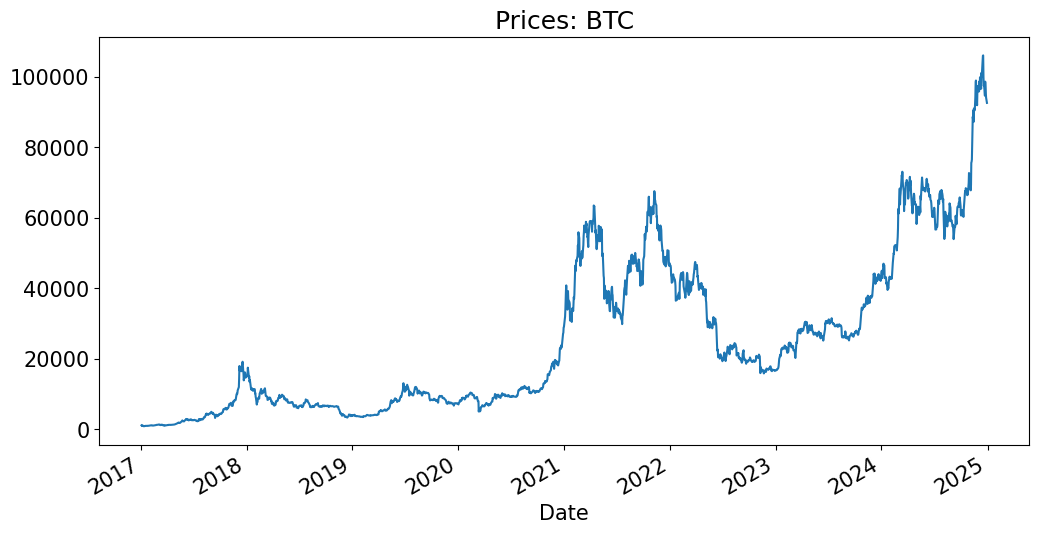

In [10]:
TICK = 'BTC'
prices[TICK].plot(title=f'Prices: {TICK}');

### Drawdown Graph

Write a function that, at every point in time, shows the drawdown of the return relative to the previous maximum.

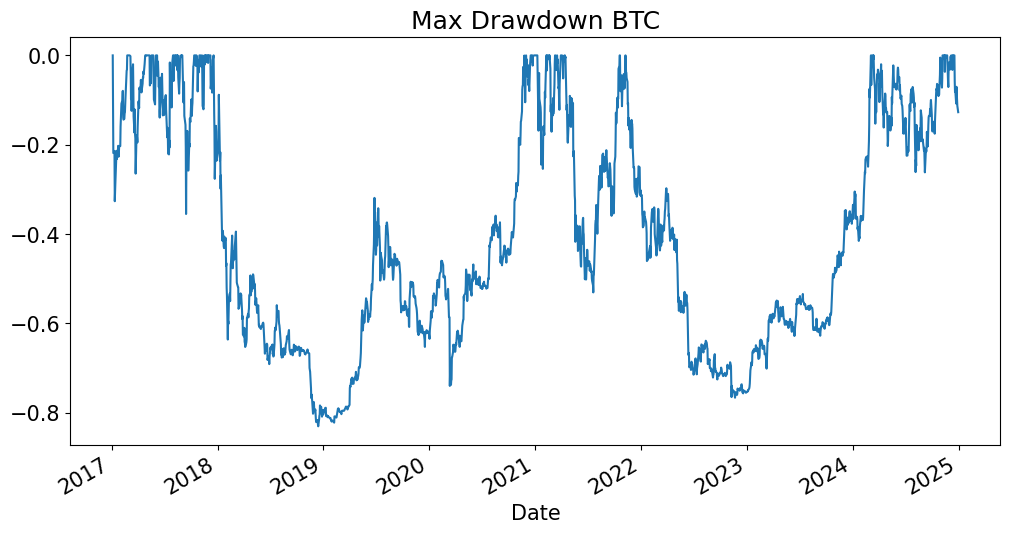

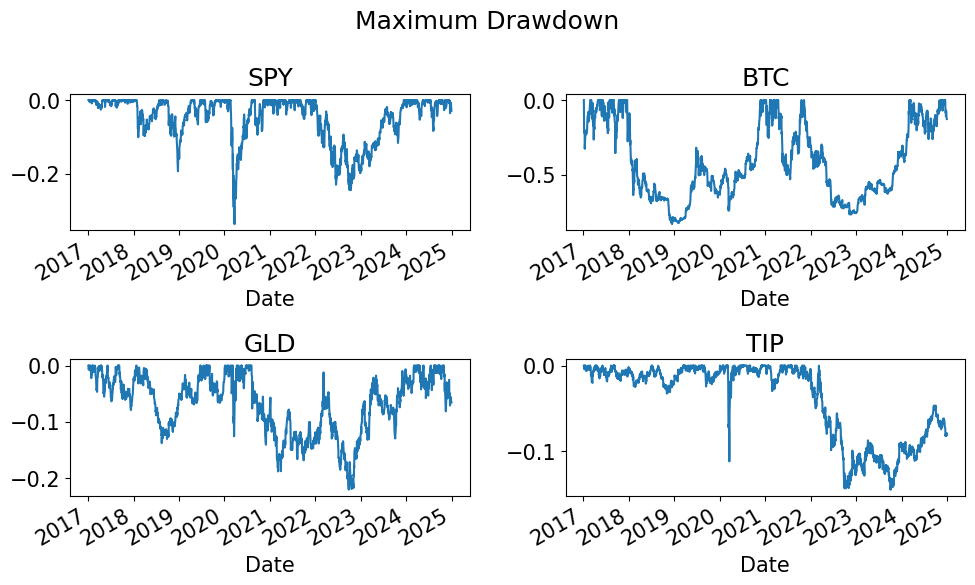

In [11]:
drawdown = mdd_timeseries(rets)
drawdown[TICK].plot(title=f'Max Drawdown {TICK}');
plt.show()


fig, ax = plt.subplots(2,2,figsize=(10,6))
for i in range(4):
    lab = drawdown.columns[i*3]
    drawdown.iloc[:,3*i].plot(ax=ax[i%2,int(np.floor(i/2))],title=lab)

plt.suptitle('Maximum Drawdown')
plt.tight_layout()
plt.show()

## Quantiles

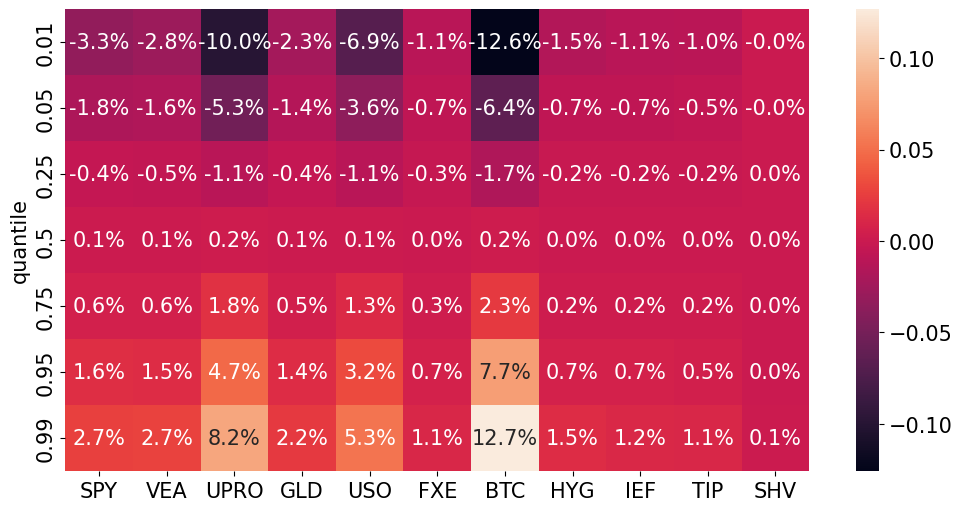

In [12]:
quantiles = rets.quantile(q=[.01,.05,.25,.5,.75,.95,.99])
quantiles.index.name = 'quantile'

quantiles.reset_index(inplace=True)
quantiles['quantile'] = quantiles['quantile'].astype(str)
quantiles.set_index('quantile',inplace=True)
quantiles.style.format('{:.2%}')

sns.heatmap(quantiles,annot=True,fmt='.1%')
plt.show()

## Normal Distribution?

**None** of the measures discussed above rely on a normal distribution.

So how good of an approximation is a normal distribution?

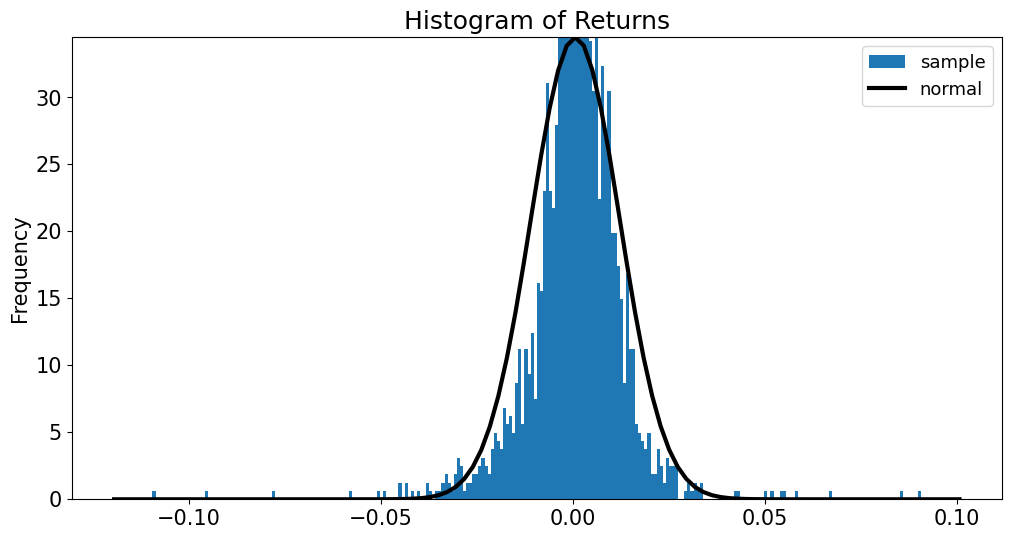

In [13]:
data = rets['SPY']
fig = plot_normal_histogram(data,bins=250);
plt.title('Histogram of Returns');
plt.show()

### Outliers

The histogram doesn't look too far off at first glance.

But consider the outliers.
* A normal distribution implies 5 and 10 std.dev. outliers almost never happen.
* In the sample above, there are numerous.

#### Outlier Table
* The outlier table below shows z-scores for the min and max return.
* The final two columns show the probability of such values happening under a normal distribution.

In [14]:
outlier_normal(rets).set_caption('Daily')

,z min,z max,normal prob min,normal prob max
SPY,-9.51,7.78,9.38e-22,3.66e-15
VEA,-10.26,8.11,5.16e-25,2.22e-16
UPRO,-10.06,7.97,4.17e-24,7.77e-16
GLD,-6.20,5.51,2.75e-10,1.75e-08
USO,-10.38,6.82,1.60e-25,4.65e-12
FXE,-4.53,4.67,3.00e-06,1.48e-06
BTC,-8.37,5.56,2.98e-17,1.34e-08
HYG,-9.98,11.82,9.48e-24,0.00e+00
IEF,-5.78,6.08,3.72e-09,6.13e-10
TIP,-7.52,11.63,2.64e-14,0.00e+00


#### Astronomical

The probabilities are astronomical.
* Clearly the returns are not normally distributed--particularly for tail events.

Ironically, this means that a normal distribution as a rough approximation might be fine--except for the events we care most about in managing risk--big outliers.

### Time Frequency

However, consider that the normality may depend on the frequency of the data.
* At finer granularity, (daily, intra-daily,) perhaps the aberrations are stronger.
* At a less frequent time interval, perhaps these compound and average out.

#### Monthly returns
The table below repeats the example for monthly returns.

In [15]:
retsM = prices.resample('ME').last().pct_change()
outlier_normal(retsM).set_caption('Monthly')

,z min,z max,normal prob min,normal prob max
SPY,-2.95,2.45,1.61e-03,7.08e-03
VEA,-3.36,2.92,3.84e-04,1.75e-03
UPRO,-3.54,2.36,1.98e-04,9.20e-03
GLD,-2.13,2.66,1.64e-02,3.95e-03
USO,-4.87,3.02,5.70e-07,1.27e-03
FXE,-2.41,2.72,7.91e-03,3.28e-03
BTC,-1.91,2.77,2.80e-02,2.80e-03
HYG,-4.45,2.72,4.32e-06,3.25e-03
IEF,-2.41,2.26,8.01e-03,1.19e-02
TIP,-4.45,2.65,4.35e-06,4.03e-03


***

# Multivariable Risk

## Covariance

The covariance is defined as

$$\sigma_{i,j} = \E\left[(r_{i,t}-\mu_i)(r_{j,t}-\mu_j)\right]$$

* A covariance of a variable with itself is the variance.

The sample estimate of the covariance is

$$\hat{\sigma}_{i,j} = \frac{1}{\Ntime}\sum_{t=1}^\Ntime\left(r_{i,t} - \meanest_i\right)\left(r_{j,t} - \meanest_j\right)$$

#### Covariance Matrix

For $\Nassets$ assets, it is easier to use matrix notation to write the coviariance $\sigma_{i,j}$ as the $i$ row and $j$ column of the $\Nassets\times \Nassets$ **covariance matrix**.
* Note that the diagonal of the matrix is the set of asset variances, $\sigma_{j,j}=\sigma^2_j$.

Let $\rmat$ denote the $\Ntime\times \Nassets$ matrix of sample returns.
* Each of $\Ntime$ rows is a sample observation (period of time).
* Each of $\Nassets$ columns is an asset return.

Perhaps somewhat confusingly, it is common to denote this covariance matrix using the capital Greek letter, $\Sigma$. This looks like a summation sign, but it denotes the $\Nassets\times \Nassets$ covariance:

$$\covmat = \E\left[(\rvec-\muvec)(\rvec-\muvec)'\right]$$

The sample estimator is the $\Nassets\times\Nassets$ matrix,
$$\covest = (\rmat-\meanestvec)(\rmat-\meanestvec)'\left(\frac{1}{\Ntime-\Nassets}\right)$$

where $\meanest$ denotes the $\Nassets\times 1$ vector of sample averages:

$$\meanestvec = \rmat'\onevecNt \left(\frac{1}{\Ntime}\right)$$

and where $\onevecNt$ denotes the $\Ntime\times 1$ vector of ones.

#### Technical Note: Properties of the Covariance Matrix
The covariance matrix is
* symmetric: $\Nassets(\Nassets+1)/2$ unique elements
* positive (semi) definite

Positive definite
* does **not** mean each element of the matrix, $\sigma_{i,j}$ is positive
* it means that any combination of the assets will have non-negative variance.

Mathematically, for any $\Nassets\times 1$ $w$, 
$$w'\covest w\ge 0$$

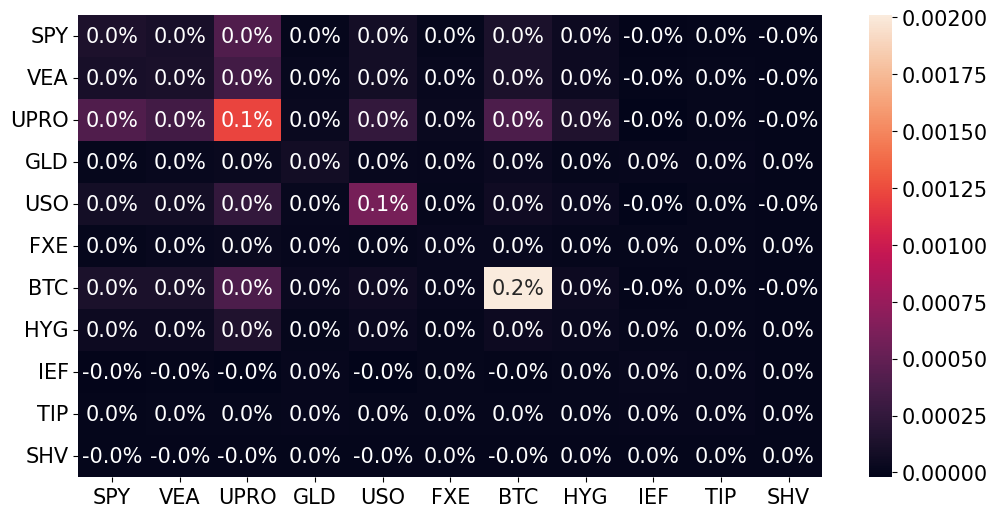

In [16]:
sns.heatmap(rets.cov(),annot=True,fmt='.1%');

## Correlation

The scale of the covariance matrix makes it harder to interpret.

Consider the **correlation**, which rescales the covariance in a way that is much more useful for interpretation:
* between -1 and 1
* same sign as the covariance

$$\rho_{i,j} = \frac{\sigma_{i,j}}{\sigma_i\sigma_j}$$

Consider the matrix of correlations.
* will be positive semi-definite, as is the covariance matrix.

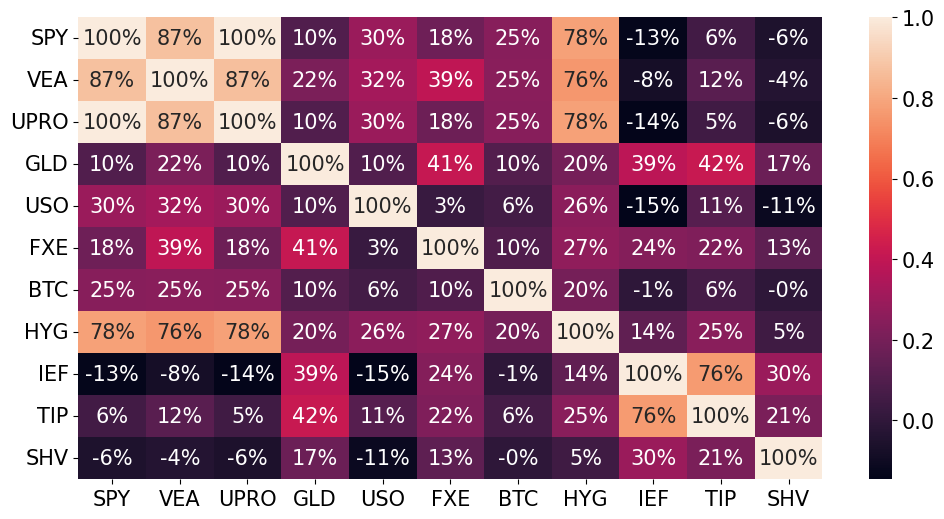

In [17]:
sns.heatmap(rets.corr(),annot=True,fmt='.0%');

## Beta

Consider a linear decomposition of $r_i$ on $r_j$:
$$r_{i,t} = \alpha + \beta r_{j,t} + \epsilon_t$$

The OLS sample estimator of $\beta$ is
$$\begin{bmatrix}\hat{\alpha}\\ \hat{\beta}\end{bmatrix} = (\rmat_j'\rmat_j)^{-1}\rmat_j'\rvec_i$$

where $\rmat_j$ denotes the $N\times 2$ matrix where the first column is a vector of ones and the second column is the vector of sample returns of $r_{j,t}$ for $1\le t\le \Ntime$.


### Scaled correlation
Equivalently, for a single-variable regression, the **beta is simply a scaled correlation**:

$$\beta = \frac{\sigma_i}{\sigma_j}\rho_{i,j}$$

The sample estimator is then the product of the sample estimates of these standard deviations and the correlation.

Thus, for bivariate measures, 
#### Covariance, correlation, and beta are just three ways of scaling the relationship

In [18]:
COMP = 'SPY'
birisk = pd.DataFrame(dtype=float, columns=['corr','cov','beta'], index=rets.columns)
birisk['corr'] = rets.corr()[COMP]
birisk['cov'] = rets.cov()[COMP] * FREQ
for sec in rets.columns:
    birisk.loc[sec,'beta'] = LinearRegression().fit(rets[[COMP]],rets[[sec]]).coef_[0]

birisk.columns = [f'{COMP} {col}' for col in birisk.columns]
birisk.style.format({birisk.columns[0]:'{:.2%}',birisk.columns[1]:'{:.4%}',birisk.columns[2]:'{:.4f}'})

,SPY corr,SPY cov,SPY beta
SPY,100.00%,3.3724%,1.0000
VEA,87.02%,2.7713%,0.8218
UPRO,99.92%,10.1648%,3.0141
GLD,9.77%,0.2484%,0.0737
USO,29.68%,2.1129%,0.6265
FXE,17.91%,0.2371%,0.0703
BTC,24.74%,3.2330%,0.9587
HYG,78.18%,1.2593%,0.3734
IEF,-13.46%,-0.1704%,-0.0505
TIP,5.55%,0.0618%,0.0183


## Multivariate Beta

Beta as a rescaled correlation is helpful, but regression betas can be much more.

Consider a multivariate regression:

$$r_{i,t} = \alpha + \beta_j r_{j,t} +\beta_k r_{k,t} + \epsilon_t$$

The OLS sample estimator of $\beta$ is
$$\begin{bmatrix}\hat{\alpha}\\ \hat{\beta}_j\\ \hat{\beta}_k\end{bmatrix} = (\rmat'\rmat)^{-1}\rmat'\rvec_i$$

noting that here $\rmat$ denotes the matrix with columns of 
* ones, 
* $r_{j,t}$
* $r_{k,t}$

That is, each row is an observation, $t$, and each colmn is a variable, $(1, r_j, r_k)$.

In [19]:
COMPS = ['SPY','VEA']
betas = pd.DataFrame(dtype=float, columns=COMPS, index=rets.columns)
for sec in rets.columns:
    betas.loc[sec] = LinearRegression().fit(rets[COMPS],rets[[sec]]).coef_

betas.join(birisk['SPY beta']).rename(columns={'SPY beta': 'SPY (univariate)'}).style.format('{:.2f}')

,SPY,VEA,SPY (univariate)
SPY,1.00,-0.00,1.00
VEA,0.00,1.00,0.82
UPRO,3.01,-0.00,3.01
GLD,-0.28,0.43,0.07
USO,0.15,0.58,0.63
FXE,-0.26,0.41,0.07
BTC,0.45,0.62,0.96
HYG,0.24,0.16,0.37
IEF,-0.10,0.06,-0.05
TIP,-0.07,0.10,0.02
